In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [5]:
def df_add_missing(df, gene_list):
    found = df.index.isin(gene_list)
    missing_genes = [x for x in gene_list if x not in found]
    df = df.reindex(df.index.union(missing_genes), fill_value=0)
    df = df.loc[gene_list]
    assert len(df) == len(gene_list)
    return df

In [4]:
with open('/project/deeprna/data/tf_genes/trans_regulators_final_ensg.txt', 'r') as f:
    tf_ensg = f.read().strip().split()

with open('/project/deeprna/data/tf_genes/trans_regulators_final_hgnc.txt', 'r') as f:
    tf_hgnc = f.read().strip().split()

hgnc_ensg_dict = {hg:en for (hg, en) in zip(tf_hgnc, tf_ensg)}

# First find missing genes. Also we exclude pseudoautosomal copies.

enc = pd.read_csv('/project/deeprna_data/encode_data/0/rna_total_quantification_s1_r1.tsv', sep='\t')
enc = enc.loc[~enc.gene_id.str.contains('PAR')]
enc.gene_id = [x.split('.')[0] for x in enc.gene_id]
enc_missing = [x for x in tf_ensg if x not in enc.gene_id.values]
print(enc_missing)

[]


In [7]:
coding_genes = pd.read_csv('/project/deeprna/data/mRNA_halflife_features_epinformer.csv')
coding_genes.head()

,chrom,TSS,gene_id,Gene name,Gene description,UTR5LEN_log10zscore,CDSLEN_log10zscore,INTRONLEN_log10zscore,UTR3LEN_log10zscore,UTR5GC,CDSGC,UTR3GC,ORFEXONDENSITY
0,X,100636750,ENSG00000000003,TSPAN6,tetraspanin 6 [Source:HGNC Symbol;Acc:HGNC:11858],-0.100751,-0.811863,-0.338849,0.466825,0.625,0.412,0.368,9.62
1,X,100584935,ENSG00000000005,TNMD,tenomodulin [Source:HGNC Symbol;Acc:HGNC:17757],0.310663,-0.459532,0.010034,-0.585056,0.470,0.419,0.393,7.42
2,20,50958531,ENSG00000000419,DPM1,dolichyl-phosphate mannosyltransferase subunit...,-0.888084,-0.600173,0.215354,-0.354934,0.000,0.435,0.262,11.75
3,1,169893895,ENSG00000000457,SCYL3,SCY1 like pseudokinase 3 [Source:HGNC Symbol;A...,0.322004,0.695835,0.430399,0.088565,0.613,0.450,0.369,5.87
4,1,169795044,ENSG00000000460,C1orf112,chromosome 1 open reading frame 112 [Source:HG...,1.034899,0.881129,0.581165,0.358718,0.411,0.421,0.355,8.67


In [15]:
total_rna_dict = {}
polya_rna_dict = {}
for tissue_id in range(0,393):

    tissue_dir = f'/project/deeprna_data/encode_data/{tissue_id}'

    total_rna = []
    for file in glob.glob(f'{tissue_dir}/rna_total_*.tsv'):
        exp = pd.read_csv(file, sep='\t')[['gene_id', 'TPM']]
        exp = exp.loc[~exp.gene_id.str.contains('PAR')] # Not excluding pseudoautosomal copies leads to duplicated gene IDs.
        exp.gene_id = [x.split('.')[0] for x in exp.gene_id]
        exp.index = exp.gene_id
        #exp = df_add_missing(exp, tf_ensg)
        exp = exp[['TPM']]
        total_rna.append(exp)

    if total_rna:
        total_rna = pd.concat(total_rna, axis=1)
        total_rna = total_rna.mean(axis=1).reset_index()
        total_rna.columns = ['gene_id', 'TPM']
        total_rna_dict[tissue_id] = total_rna

    polya_rna = []
    for file in glob.glob(f'{tissue_dir}/rna_polyA_*.tsv'):
        exp = pd.read_csv(file, sep='\t')[['gene_id', 'TPM']]
        exp = exp.loc[~exp.gene_id.str.contains('PAR')]
        exp.gene_id = [x.split('.')[0] for x in exp.gene_id]
        exp.index = exp.gene_id
        #exp = df_add_missing(exp, tf_ensg)
        exp = exp[['TPM']]
        polya_rna.append(exp)

    if polya_rna:
        polya_rna = pd.concat(polya_rna, axis=1)
        polya_rna = polya_rna.mean(axis=1).reset_index()
        polya_rna.columns = ['gene_id', 'TPM']
        polya_rna_dict[tissue_id] = polya_rna

    print(tissue_id, 'done')

0 done
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
51 done
52 done
53 done
54 done
55 done
56 done
57 done
58 done
59 done
60 done
61 done
62 done
63 done
64 done
65 done
66 done
67 done
68 done
69 done
70 done
71 done
72 done
73 done
74 done
75 done
76 done
77 done
78 done
79 done
80 done
81 done
82 done
83 done
84 done
85 done
86 done
87 done
88 done
89 done
90 done
91 done
92 done
93 done
94 done
95 done
96 done
97 done
98 done
99 done
100 done
101 done
102 done
103 done
104 done
105 done
106 done
107 done
108 done
109 done
110 done
111 done
112 done
113 done
114 done
115 done
116 done
117 done
118 done
119 done
120 done
121 done
122 done
123

In [21]:
total_rna_dict[0]

,gene_id,TPM
0,10904,0.000
1,12954,0.000
2,12956,0.000
3,12958,0.000
4,12960,0.000
...,...,...
59476,gSpikein_ERCC-00165,9.025
59477,gSpikein_ERCC-00168,0.105
59478,gSpikein_ERCC-00170,2.740
59479,gSpikein_ERCC-00171,613.690


In [22]:
total_rna_coding = []
for tissue_id in total_rna_dict:
    df = total_rna_dict[tissue_id]
    df = df[df.gene_id.isin(coding_genes.gene_id)]
    df.index = df.gene_id
    df.drop(columns='gene_id', inplace=True)
    total_rna_coding.append(df)

total_rna_coding = pd.concat(total_rna_coding, axis=1)
total_rna_coding['trans_regulator'] = total_rna_coding.index.isin(tf_ensg)
total_rna_coding.head()

/scratch/local/ipykernel_57749/2004453127.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='gene_id', inplace=True)
/scratch/local/ipykernel_57749/2004453127.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='gene_id', inplace=True)
/scratch/local/ipykernel_57749/2004453127.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='gene_id', inplace=True)
/scratch/local/ipykernel_57749/200

,TPM,TPM,TPM,TPM,TPM,TPM,TPM,TPM,TPM,TPM,...,TPM,TPM,TPM,TPM,TPM,TPM,TPM,TPM,TPM,trans_regulator
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,0.140,2.79,18.380,0.050,0.465,59.260,9.52,0.031667,2.285,16.125,...,2.85,2.66,2.04,1.44,1.82,4.16,3.50,2.26,2.510,False
ENSG00000000005,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000000,0.000,1.225,...,0.00,0.00,0.04,0.07,0.00,0.00,0.03,0.00,0.045,False
ENSG00000000419,114.885,45.73,29.525,14.865,19.810,78.065,37.40,18.695000,6.640,20.635,...,7.65,6.26,6.97,7.82,8.25,6.48,9.90,7.58,8.050,False
ENSG00000000457,3.465,1.88,2.395,7.370,1.270,2.740,1.89,2.733333,0.755,1.770,...,3.24,3.39,2.97,2.86,2.65,3.95,4.14,3.69,3.175,False
ENSG00000000460,20.195,5.61,13.840,4.555,0.835,7.290,10.28,6.680000,0.440,9.610,...,2.66,1.59,2.67,1.33,2.30,3.22,2.86,2.03,2.005,False


/scratch/local/ipykernel_57749/1785678515.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


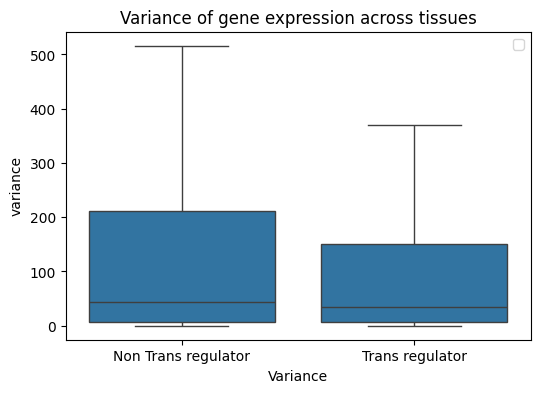

In [59]:
# Plot variance for TFs vs non-TFs. Exclude genes with <0.2 expression in all tissues.
nontfs = total_rna_coding[~total_rna_coding.trans_regulator]
tfs = total_rna_coding[total_rna_coding.trans_regulator]
nontfs = nontfs.drop(columns='trans_regulator')
tfs = tfs.drop(columns='trans_regulator')
nontfs = nontfs.loc[(nontfs > 0.2).any(axis=1)]
tfs = tfs.loc[(tfs > 0.2).any(axis=1)]

vars = pd.concat([nontfs.var(axis=1), tfs.var(axis=1)], axis=1).fillna(0).sum(axis=1)
vars = pd.DataFrame({'variance': vars})
vars['trans_regulator'] = ['Trans regulator' if x else 'Non Trans regulator' for x in vars.index.isin(tf_ensg)]
vars['dispersion'] = vars['variance'] / total_rna_coding.drop(columns='trans_regulator').mean(axis=1)

plt.figure(figsize=(6,4))
# Boxplot, showing variance for tfs and nontfs side by side
sns.boxplot(data=vars, x='trans_regulator', y='variance', showfliers=False)
plt.xlabel('Variance')
plt.legend()
plt.title('Variance of gene expression across tissues')
plt.show()

/scratch/local/ipykernel_57749/1992310399.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


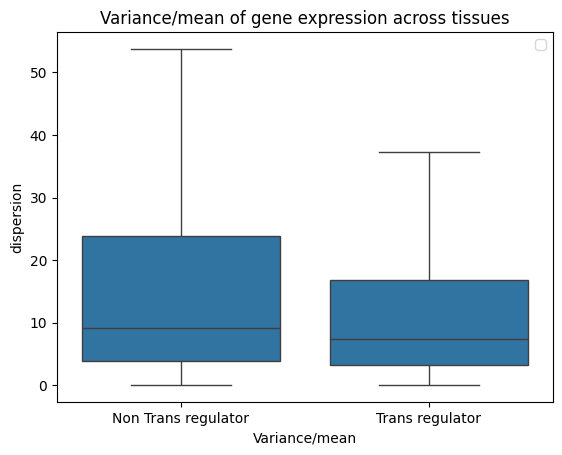

In [61]:
sns.boxplot(data=vars, x='trans_regulator', y='dispersion', showfliers=False)
plt.xlabel('Variance/mean')
plt.legend()
plt.title('Variance/mean of gene expression across tissues')
plt.show()

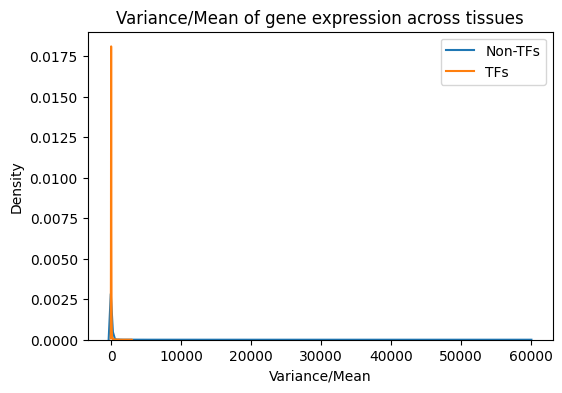

In [26]:
# Plot variance/mean for TFs vs non-TFs. Exclude genes with <0.2 expression in all tissues.
nontfs = total_rna_coding[~total_rna_coding.trans_regulator]
tfs = total_rna_coding[total_rna_coding.trans_regulator]

nontfs = nontfs.drop(columns='trans_regulator')
tfs = tfs.drop(columns='trans_regulator')

nontfs = nontfs.loc[(nontfs > 0.2).any(axis=1)]
tfs = tfs.loc[(tfs > 0.2).any(axis=1)]

nontf_dispersion = nontfs.var(axis=1) / nontfs.mean(axis=1)
tf_dispersion = tfs.var(axis=1) / tfs.mean(axis=1)

plt.figure(figsize=(6,4))
sns.kdeplot(nontf_dispersion, label='Non-TFs')
sns.kdeplot(tf_dispersion, label='TFs')
plt.xlabel('Variance/Mean')
plt.legend()
plt.title('Variance/Mean of gene expression across tissues')
plt.show()

In [18]:
total_rna_dict[0][total_rna_dict[0].gene_id.isin(coding_genes.gene_id)]

,gene_id,TPM
649,ENSG00000000003,0.140
650,ENSG00000000005,0.000
651,ENSG00000000419,114.885
652,ENSG00000000457,3.465
653,ENSG00000000460,20.195
...,...,...
45865,ENSG00000259399,0.025
45893,ENSG00000259431,2.540
45959,ENSG00000259511,2.545
46010,ENSG00000259571,0.660
